In [84]:
!pip install astronify

In [5]:

from astronify.series import SoniSeries
from astropy.table import Table
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


WxPython is not found for the current python version.
Pyo will use a minimal GUI toolkit written with Tkinter (if available).
This toolkit has limited functionnalities and is no more
maintained or updated. If you want to use all of pyo's
GUI features, you should install WxPython, available here:
http://www.wxpython.org/



In [147]:
ls

data/                 sonifyLCA.wav         sonifyPLAsTiCC.ipynb


In [87]:
!wget https://zenodo.org/record/2539456/files/plasticc_train_metadata.csv.gz

--2021-06-20 13:33:06--  https://zenodo.org/record/2539456/files/plasticc_train_metadata.csv.gz
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 370350 (362K) [application/octet-stream]
Saving to: 'plasticc_train_metadata.csv.gz'

plasticc_train_meta 100%[===================>] 361.67K   207KB/s    in 1.7s    

2021-06-20 13:33:09 (207 KB/s) - 'plasticc_train_metadata.csv.gz' saved [370350/370350]



In [88]:
!wget https://zenodo.org/record/2539456/files/plasticc_train_lightcurves.csv.gz

--2021-06-20 13:33:11--  https://zenodo.org/record/2539456/files/plasticc_train_lightcurves.csv.gz
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21553100 (21M) [application/octet-stream]
Saving to: 'plasticc_train_lightcurves.csv.gz'

plasticc_train_ligh 100%[===================>]  20.55M  4.00MB/s    in 16s     

2021-06-20 13:33:28 (1.32 MB/s) - 'plasticc_train_lightcurves.csv.gz' saved [21553100/21553100]



In [89]:
!mkdir data

mkdir: data: File exists


In [90]:
!mv plasticc* data

In [3]:
ls data

plasticc_train_lightcurves.csv.gz  plasticc_train_metadata.csv.gz


In [6]:
dataREAD = pd.read_csv("data/plasticc_train_lightcurves.csv.gz")

In [11]:
obj1 = dataREAD["object_id"].isin([31601139]) #20222858, 615 is weird, 31601139, 66626509 is cool
obj1DATA = dataREAD[obj1]
time = obj1DATA["mjd"]
flux = obj1DATA["flux"]
obj1DATA

,object_id,mjd,passband,flux,flux_err,detected_bool
867750,31601139,59591.2554,5,-17.186377,22.548611,0
867751,31601139,59594.2004,5,-13.339062,30.613119,0
867752,31601139,59597.1905,5,-7.165829,52.419529,0
867753,31601139,59598.3704,4,-2.019011,29.426947,0
867754,31601139,59602.3507,3,-10.196972,13.274638,0
...,...,...,...,...,...,...
867873,31601139,60662.2603,5,0.992845,15.576884,0
867874,31601139,60665.2816,3,10.617948,4.601872,0
867875,31601139,60668.3474,4,-27.324520,13.513007,0
867876,31601139,60671.2701,0,6.584654,7.009771,0


In [8]:
dataMETA = pd.read_csv("data/plasticc_train_metadata.csv.gz")
objTF = dataMETA["object_id"].isin([31601139])#31601139
objT = dataMETA[objTF]
print(objT["true_target"])

3500    90
Name: true_target, dtype: int64


In [163]:
objT

,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,...,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
3500,31601139,165.7617,-32.4429,0,0.442,0.427,0.02,41.851,0.077,90,...,0.0,0.0,60422.77,49331,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data_table = Table({"time":time,"flux":flux})

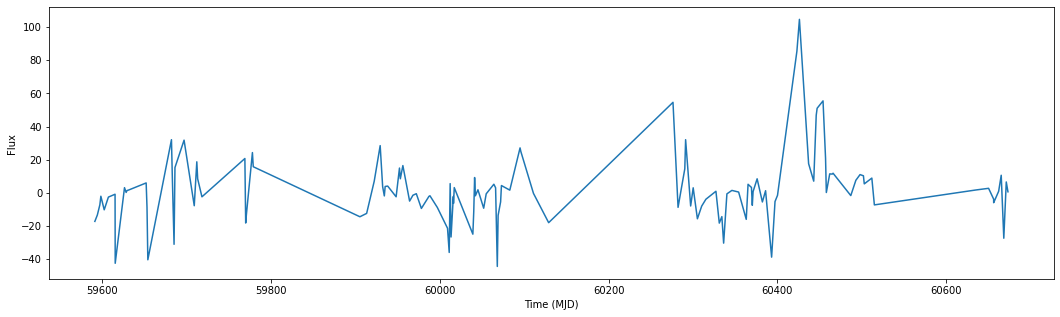

In [12]:
f, ax = plt.subplots(figsize=(18,5))
ax.plot(time, flux)
ax.set_xlabel("Time (MJD)")
ax.set_ylabel("Flux")
plt.show()

In [13]:
sonifyLC = SoniSeries(data_table)

In [14]:
sonifyLC.pitch_mapper.pitch_map_args
{'pitch_range': [55, 1760],
 'center_pitch': 440,
 'zero_point': 'median',
 'stretch': 'linear'
 }

{'pitch_range': [55, 1760],
 'center_pitch': 440,
 'zero_point': 'median',
 'stretch': 'linear'}

In [171]:
sonifyLC.pitch_mapper.pitch_map_args["minmax_percent"] = [0.5, 99.5]

In [157]:
del sonifyLC.pitch_mapper.pitch_map_args["minmax_percent"]

In [15]:
sonifyLC.sonify()

In [ ]:
sonifyLC.play();

In [ ]:
sonifyLC.stop();

In [16]:
sonifyLC.write("sonifyLCA.wav")

Pyo message: Offline Server rendering file sonifyLCA.wav dur=3.356922
Pyo message: Offline Server rendering finished.


In [ ]:
#################################################

In [17]:
obj1DATA

,object_id,mjd,passband,flux,flux_err,detected_bool
867750,31601139,59591.2554,5,-17.186377,22.548611,0
867751,31601139,59594.2004,5,-13.339062,30.613119,0
867752,31601139,59597.1905,5,-7.165829,52.419529,0
867753,31601139,59598.3704,4,-2.019011,29.426947,0
867754,31601139,59602.3507,3,-10.196972,13.274638,0
...,...,...,...,...,...,...
867873,31601139,60662.2603,5,0.992845,15.576884,0
867874,31601139,60665.2816,3,10.617948,4.601872,0
867875,31601139,60668.3474,4,-27.324520,13.513007,0
867876,31601139,60671.2701,0,6.584654,7.009771,0


In [73]:
obj1UF = obj1DATA["passband"].isin([0])
obj1U = obj1DATA[obj1UF]
timeU = obj1U["mjd"]
fluxU = obj1U["flux"]
data_tableU = Table({"time":timeU,"flux":fluxU})
sonifyU = SoniSeries(data_tableU)
sonifyU.pitch_mapper.pitch_map_args['pitch_range'] = [0, 1760]
sonifyU.pitch_mapper.pitch_map_args["center_pitch"] = 55
sonifyU.note_spacing = 0.2
sonifyU.sonify()
sonifyU.write("U.wav")

Pyo message: Offline Server rendering file U.wav dur=3.878328
Pyo message: Offline Server rendering finished.


In [74]:
obj1GF = obj1DATA["passband"].isin([1])
obj1G = obj1DATA[obj1GF]
timeG = obj1G["mjd"]
fluxG = obj1G["flux"]
data_tableG = Table({"time":timeG,"flux":fluxG})
sonifyG = SoniSeries(data_tableG)
sonifyG.pitch_mapper.pitch_map_args["center_pitch"] = 110
sonifyG.note_spacing = 0.2
sonifyG.sonify()
sonifyG.write("G.wav")

Pyo message: Offline Server rendering file G.wav dur=5.994019
Pyo message: Offline Server rendering finished.


In [75]:
obj1RF = obj1DATA["passband"].isin([2])
obj1R = obj1DATA[obj1RF]
timeR = obj1R["mjd"]
fluxR = obj1R["flux"]
data_tableR = Table({"time":timeR,"flux":fluxR})
sonifyR = SoniSeries(data_tableR)
sonifyR.pitch_mapper.pitch_map_args["center_pitch"] = 220
sonifyR.note_spacing = 0.2
sonifyR.sonify()
sonifyR.write("R.wav")

Pyo message: Offline Server rendering file R.wav dur=6.656199
Pyo message: Offline Server rendering finished.


In [76]:
obj1IF = obj1DATA["passband"].isin([3])
obj1I = obj1DATA[obj1IF]
timeI = obj1I["mjd"]
fluxI = obj1I["flux"]
data_tableI = Table({"time":timeI,"flux":fluxI})
sonifyI = SoniSeries(data_tableI)
sonifyI.pitch_mapper.pitch_map_args["center_pitch"] = 440
sonifyI.note_spacing = 0.2
sonifyI.sonify()
sonifyI.write("I.wav")

Pyo message: Offline Server rendering file I.wav dur=7.846124
Pyo message: Offline Server rendering finished.


In [77]:
obj1ZF = obj1DATA["passband"].isin([4])
obj1Z = obj1DATA[obj1ZF]
timeZ = obj1Z["mjd"]
fluxZ = obj1Z["flux"]
data_tableZ = Table({"time":timeZ,"flux":fluxZ})
sonifyZ = SoniSeries(data_tableZ)
sonifyZ.pitch_mapper.pitch_map_args["center_pitch"] = 880
sonifyZ.note_spacing = 0.2
sonifyZ.sonify()
sonifyZ.write("Z.wav")

Pyo message: Offline Server rendering file Z.wav dur=9.432143
Pyo message: Offline Server rendering finished.


In [78]:
obj1YF = obj1DATA["passband"].isin([5])
obj1Y = obj1DATA[obj1YF]
timeY = obj1Y["mjd"]
fluxY = obj1Y["flux"]
data_tableY = Table({"time":timeY,"flux":fluxY})
sonifyY = SoniSeries(data_tableY)
sonifyY.pitch_mapper.pitch_map_args["center_pitch"] = 1760
sonifyY.note_spacing = 0.2
sonifyY.sonify()
sonifyY.write("Y.wav")

Pyo message: Offline Server rendering file Y.wav dur=9.092097
Pyo message: Offline Server rendering finished.
